In [19]:
include("../EuclidElements.jl");

# Book 1

## Proposition 10

To bisect a given finite straight line.

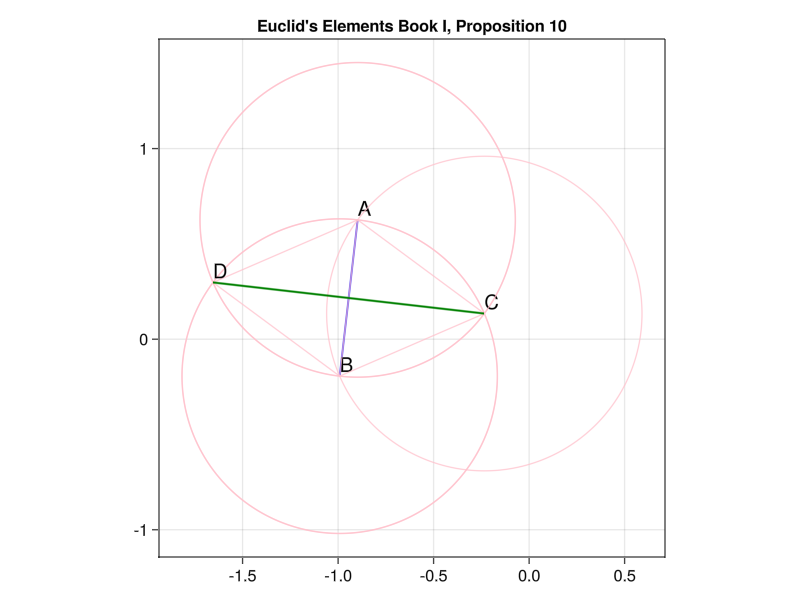

In [21]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 10")

# Let AB be the given finite straight line
A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")

#Thus it is required to bisect the finite straight line AB.

#Let the equilateral triangle ABC be constructed on it [I.1],
ABC = equilateral_triangle(A, B, color=:pink)
fill_equilateral(ABC)
C = Point(ABC)
text!(C, text="C")

#and let the angle ACB be bisected by the straight line CD [I.9];
CD = bisect_angle(C, B, A, color=:pink)
fill_bisect_angle(CD)
D = Point(CD)
text!(D, text="D")

# Draw line CD
CD_line = straight_line(C, D, color=:green, linewidth=2f0, cursorwidth=0.025f0)
fill_line(CD_line)

#I say that the straight line AB has been bisected at the point D.

#For, since AC is equal to CB, and CD is common,
#  the two sides AC, CD are equal to the two sides BC, CD respectively;
#and the angle ACD is equal to the angle BCD;
#    therefore the base AD is equal to the base BD [I.4]

#Therefore the given finite straight line has been bisected at D.

#QEF

#Draw and show the chart :)
current_figure()

### Animation

In [23]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 10")
xlims!(ax, -3,3)
ylims!(ax, -3,3)

# Let AB be the given finite straight line
A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")

#Thus it is required to bisect the finite straight line AB.

#Let the equilateral triangle ABC be constructed on it [I.1],
ABC = equilateral_triangle(A, B, color=:pink, cursorlw=0.025f0, linewidth=5f0)
C = Point(ABC)
C_opac = Observable(0f0)
text!(C, text="C", color=@lift(RGBA(0,0,0,$C_opac)))

#and let the angle ACB be bisected by the straight line CD [I.9];
CD = bisect_angle(C, B, A, color=:pink, linewidth=5f0)
D = Point(CD)
D_opac = Observable(0f0)
text!(D, text="D", color=@lift(RGBA(0,0,0,$D_opac)))

# Draw line CD
CD_line = straight_line(C, D, color=:green, linewidth=2f0, cursorwidth=0.025f0)

#I say that the straight line AB has been bisected at the point D.

#For, since AC is equal to CB, and CD is common,
#  the two sides AC, CD are equal to the two sides BC, CD respectively;
#and the angle ACD is equal to the angle BCD;
#    therefore the base AD is equal to the base BD [I.4]
tricomp = compare_triangle(C, A, D, C, B, D, Point2f0(-1.5f0, 1.5f0), 0f0, color=:pink, cursorcolor=:pink, precision=5, linewidth=5f0, cursorlinewidth=0.5f0)

#Therefore the given finite straight line has been bisected at D.

#QEF


# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 3.5f0π, step=3.5f0π/(d_s*framerate))

record(f, "Euclid-I-10.gif", timestamps; framerate=framerate) do t
    # Animate equilateral ABC
    animate_equilateral(ABC, 0.5f0π, 1f0π, t, fade_start=1.25f0π, fade_end=1.75f0π)
    if t > 1f0π && t < 1.25f0π
        C_opac[] = (t-π)/0.25f0π
    elseif t >= 1.25f0π
        C_opac[] = 1f0
    end

    #Animate bisecting angle ACB
    animate_bisect_angle(CD, 1.25f0π, 2f0π, t, fade_start=2.25f0π, fade_end=2.5f0π)
    if t > 1.75f0π && t < 2f0π
        D_opac[] = (t-1.75f0π)/0.25f0π
    elseif t >= 2f0π
        D_opac[] = 1f0
    end
    animate_line(CD_line, 2f0π, 2.25f0π, t)

    #animate triangle comparison to show good job
    animate_tricompare(tricomp, 2.5π, 3.25π, t)
end;

![animation](Euclid-I-10.gif)

#### Using Reusable Animation Code

In [20]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 10")
xlims!(ax, -3,3)
ylims!(ax, -3,3)

# Let AB be the given finite straight line
A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")

#Draw the lines and get the endpoints of C, F
CF = bisect_line(A, B, color=:pink, linewidth=5f0)
C, F = Points(CF)
CF_opac = Observable(0f0)
text!(C, text="C", color=@lift(RGBA(0,1,0,$CF_opac)))
text!(F, text="F", color=@lift(RGBA(0,1,0,$CF_opac)))

# Draw line CF
CF_line = straight_line(C, F, color=:green, linewidth=2f0, cursorwidth=0.025f0)


# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 5π, step=5π/(d_s*framerate))

record(f, "Euclid-I-10-shortcode.gif", timestamps; framerate=framerate) do t
    # animate the bisection background
    animate_bisect_line(CF, 0.5π, 2.25π, t, fade_start=2.5f0π, fade_end=3f0π)
    if t > 2.25π && t < 2.5π
        CF_opac[] = (t-2.25π)/0.25π
    elseif t >= 2.5π
        CF_opac[] = 1f0
    end

    #Animate CF
    animate_line(CF_line, 2.25f0π, 2.75f0π, t)
end;

![animation](Euclid-I-10-shortcode.gif)